# Machine Learning Engineer Nanodegree Capstone Project

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs
# Pretty display for notebooks
%matplotlib inline

In [2]:
#Import data from file
data = pd.read_csv('C:/Users/mrandjic/OneDrive - Telenor Serbia/Projects/capstone/roaming_add_on_dataset.txt', sep="\t")

In [3]:
#Display the first row
display(data.head(n=1))

,TIME_ID,SERVICE_SEG,AP_NAME,ACT_MONTH,ACT_VOL,REV,NUM_OF_MONTHS,VOICE_VPN_MIN,VOICE_ONNET_MIN,VOICE_OFFNET_MIN,...,VOICE_ROAM_MIN,SMS_NAT,SMS_INT,SMS_ROAM,GPRS_ROAM_MB,GPRS_NAT_MB,MF_REV,US_REV,FLAG,SUBSCRIPTION_ID
1,2017-07-01,Si,Travel Sure 10,7,59.584375,858.846875,2,58.046875,153.715625,279.565625,...,0.0,94.0625,2.8125,0.0,0.0,3378.146875,2602.34375,1259.478125,NO_TARGET,2907


# Data exploration part

In [4]:
#Display total number of records
n_records = data.shape[0]

#Display total number of no takers
n_no_takers = data[(data.FLAG == "NO_TARGET")].shape[0]

#Display total number of takers
n_takers = data[(data.FLAG == "TARGET")].shape[0]

# Print the results
print("Total number of records: {}".format(n_records))

#Print total numer of roaming users that didn't buy add on
print("Total number of no takers: {}".format(n_no_takers))

#Print total numer of roaming users that bought add on
print("Total number of takers: {}".format(n_takers))

Total number of records: 367869
Total number of no takers: 353087
Total number of takers: 14782


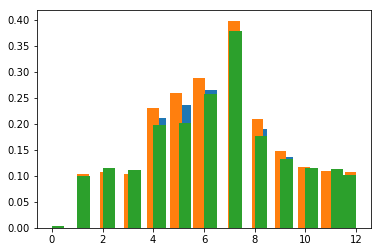

In [11]:
import matplotlib.pyplot as plt

# Plot frequeny hisotgram of roaming users for 12 months in order to check for seasonality
freq_plot_all = plt.hist(data['ACT_MONTH'],normed=True, bins=24)
# Plot frequeny hisotgram of roaming users for 12 months in order to check for seasonality
freq_plot_no_takers =plt.hist(data[(data.FLAG == "NO_TARGET")]['ACT_MONTH'],normed=True, bins=24)
# Plot frequeny hisotgram of roaming users for 12 months in order to check for seasonality
freq_plot_takers =plt.hist(data[(data.FLAG == "TARGET")]['ACT_MONTH'],normed=True, bins=24)


In [312]:
#plt.hist(data['REV'],normed=True, bins=24, range=[0, 5000])

# Log-transform the skewed features
skewed = ['REV',
          'ACT_VOL',
          'MF_REV', 
          "VOICE_VPN_MIN", 
          "VOICE_ONNET_MIN", 
          "VOICE_OFFNET_MIN", 
          "VOICE_INT_MIN", 
          "VOICE_ROAM_MIN",
          "SMS_NAT",
          "SMS_INT",
          "SMS_ROAM",
          "GPRS_ROAM_MB",
          "GPRS_NAT_MB",
          "MF_REV",
          "US_REV"]

features_raw  = data.drop('FLAG', axis = 1)
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

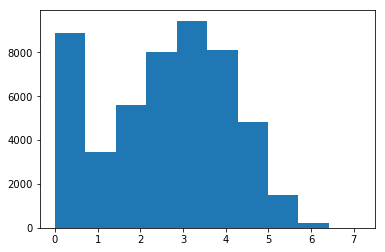

In [114]:
#x = pd.DataFrame(features_raw[skewed])

#plt.hist(x,normed=True)
#s=plt.hist(data['MF_REV'],normed=True, bins=24, range=[0, 1000])

S=plt.hist(features_raw['VOICE_VPN_MIN'])
#features_raw['MF_REV']

In [37]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
features_scaled = features_raw
features_scaled[skewed] = scaler.fit_transform(features_raw[skewed])


NameError: name 'features_raw' is not defined

,TIME_ID,SERVICE_SEG,ACT_MONTH,ACT_VOL,REV,NUM_OF_MONTHS,VOICE_VPN_MIN,VOICE_ONNET_MIN,VOICE_OFFNET_MIN,VOICE_INT_MIN,...,VOICE_INT_REV_OUT,Avg_VOICE_ROAM_REV_OUT,Avg_SMS_NAT_REV_OUT,Avg_SMS_INT_REV_OUT,SMS_ROAM_REV_OUT,Avg_GPRS_NAT_REV_OUT,Avg_GPRS_ROAM_REV_OUT,MF_REV,US_REV,SUBSCRIPTION_ID
1,2016-04-01,Br,4,0.208232,0.0,1,0.418574,0.141501,0.315828,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531845,0.0,59397


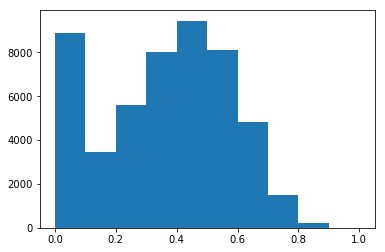

In [117]:
S=plt.hist(features_scaled['VOICE_VPN_MIN'])
# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

In [5]:
# Perform One-Hot Encoding to categorical features 
def encode_features(data_set): 
    
    TIME_ID = data['TIME_ID'] 
    FLAG    = data['FLAG'] 
    
    data_set = data_set.drop(['TIME_ID','FLAG'], axis=1)
    data_set['ACT_MONTH'] = data_set.ACT_MONTH.astype(str)
    data_set = pd.get_dummies(data_set)
    
    data_set = pd.concat([data_set, TIME_ID], axis=1)#.reset_index(drop=True)
    data_set = pd.concat([data_set, FLAG], axis=1)#.reset_index(drop=True)
    
    encoded = list(data_set.columns)
    print ("{} total features after one-hot encoding.".format(len(encoded)))
    
    return(data_set)

In [6]:
# Preprocess dataset
import datetime as dt

#Convert TIME_ID to dates, in order to make dates manupulation easier
data['TIME_ID'] = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in data['TIME_ID']]

# Encode labels to {0,1}
data['FLAG']    = data['FLAG'].replace(["NO_TARGET","TARGET"],[0,1])

# Perform One-Hot Encoding to categorical variables
data = encode_features(data)


37 total features after one-hot encoding.


In [7]:
#Define train and test set ranges

start_train_dt = dt.datetime.strptime("2016-04-01", '%Y-%m-%d').date()
end_train_dt   = dt.datetime.strptime("2017-04-01", '%Y-%m-%d').date()

start_test_dt  = dt.datetime.strptime("2017-05-01", '%Y-%m-%d').date()
end_test_dt    = dt.datetime.strptime("2017-07-01", '%Y-%m-%d').date()


In [17]:
#Generate train set with random fraction sampling from NO_TARGET class

train_set = data[(data['TIME_ID'] >= start_train_dt) & (data['TIME_ID'] <= end_train_dt)]

train_set_no_target = pd.DataFrame(train_set[(train_set['FLAG'] == 0)])
train_set_target    = train_set[(train_set['FLAG'] == 1)]

train_set_no_target = train_set_no_target.groupby(['TIME_ID'])#, 'SERVICE_SEG'
train_set_no_target= train_set_no_target.apply(lambda x: x.sample(frac=0.3))

train_set = pd.concat([train_set_no_target, train_set_target])

#train_set_no_target.shape[0]

In [18]:

# Log-transform the skewed features of train set 
pre_proc= ['REV',
          'ACT_VOL',
          'MF_REV', 
          "VOICE_VPN_MIN", 
          "VOICE_ONNET_MIN", 
          "VOICE_OFFNET_MIN", 
          "VOICE_INT_MIN", 
          "VOICE_ROAM_MIN",
          "SMS_NAT",
          "SMS_INT",
          "SMS_ROAM",
          "GPRS_ROAM_MB",
          "GPRS_NAT_MB",
          "MF_REV",
          "US_REV"]

train_set[pre_proc] = train_set[pre_proc].apply(lambda x: np.log(x + 1))



In [19]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
train_set[pre_proc] = scaler.fit_transform(train_set[pre_proc])

# Show an example of a record with scaling applied
#display(train_set.head(n = 1))

In [20]:
# Preprocess training set 

train_set_features = train_set.drop(['FLAG', 'TIME_ID', 'SUBSCRIPTION_ID'], axis = 1)
train_set_labels   = train_set['FLAG']


In [22]:
# Define and preprocess test sets

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

temp_dt = start_test_dt
test_sets_features = {}
test_sets_labels   = {}

index = 1

while temp_dt <= end_test_dt:

    temp_test_set = pd.DataFrame(data[(data['TIME_ID'] == temp_dt)])
    
    # Log-transform the skewed features of train set 
    temp_test_set[pre_proc] = temp_test_set[pre_proc].apply(lambda x: np.log(x + 1))
    
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    temp_test_set[pre_proc] = scaler.fit_transform(temp_test_set[pre_proc])

    #put preprocessed test set to collection
    test_sets_features[index] = temp_test_set.drop(['FLAG', 'TIME_ID'], axis = 1)#, 'SUBSCRIPTION_ID'
    test_sets_labels[index]   = temp_test_set['FLAG']
    
    temp_year  = temp_dt.year
    temp_month = temp_dt.month
    
    if temp_month == 12: 
        temp_year = temp_year + 1
    
    temp_month = (temp_dt.month+1)%12
    if temp_month == 0:
        temp_month=12
        
    temp_dt = dt.datetime(temp_year, temp_month, temp_dt.day).date()
    index = index + 1
    